In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')
import random
import math
import sys
import os

is_python = "inline" in matplotlib.get_backend()
if is_python:
  from IPython import display

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
import cv2
 

In [0]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!kaggle competitions download -c digit-recognizer

 89% 65.0M/73.2M [00:01<00:00, 33.9MB/s]
100% 73.2M/73.2M [00:01<00:00, 65.8MB/s]
100% 48.8M/48.8M [00:00<00:00, 33.4MB/s]

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 71.8MB/s]


In [0]:
os.listdir()

['.config',
 'test.csv',
 'sample_submission.csv',
 'kaggle.json',
 'train.csv',
 'sample_data']

In [0]:
from google.colab import files
files.upload()

Saving mnist.npz to mnist.npz


In [0]:
!ls

kaggle.json  mnist.npz	sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
train_file=  'train.csv'
test_file = 'test.csv'

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [0]:
print("Training Data: ")
print(train_data.shape)
print("\nTest Data: ")
print(test_data.shape)

Training Data: 
(42000, 785)

Test Data: 
(28000, 784)


In [0]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [0]:
test_data.keys()

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [0]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [0]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
train = train_data.values
test = test_data.values
train_label = train_data['label'].values

In [0]:
train = train[:,1:]
train.shape

(42000, 784)

In [0]:
X = train.reshape(train.shape[0],28,28)
y = train_label

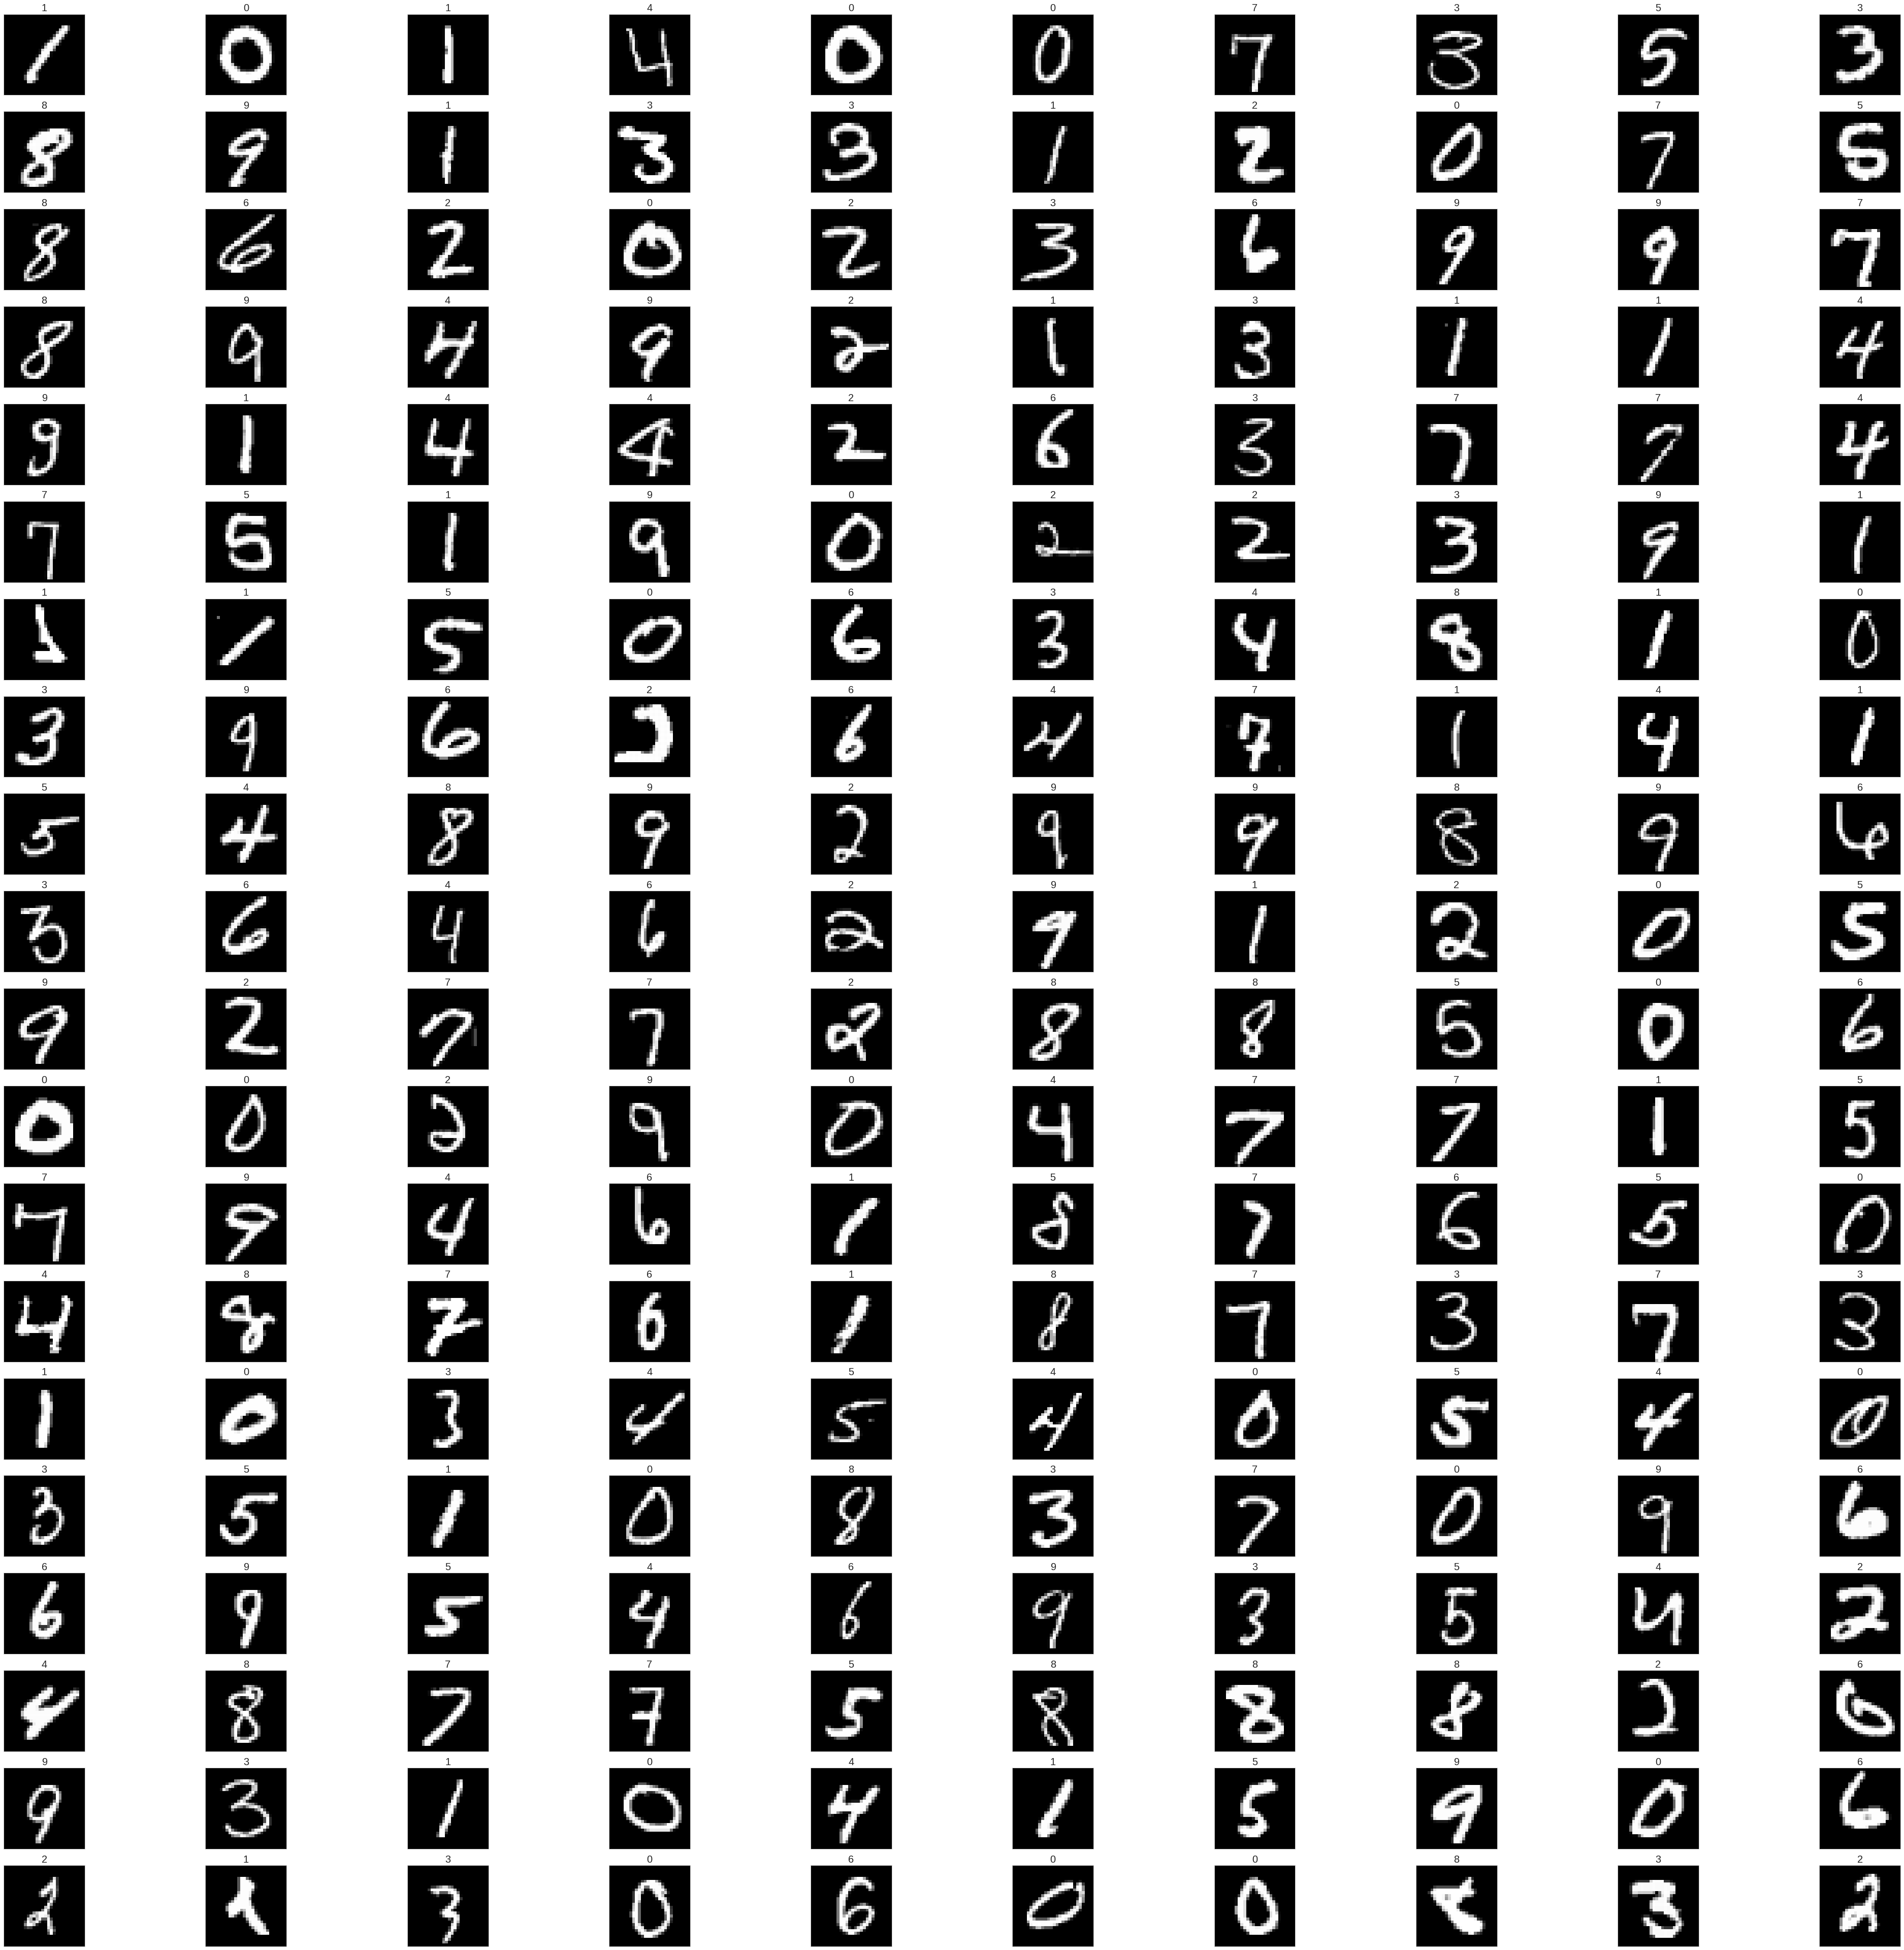

In [0]:
plt.figure(figsize=(70,70))
sns.set_style('whitegrid')
for i in range(200):
  plt.subplot(20,10,i+1)
  plt.imshow(X[i],interpolation='nearest',cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y[i],fontsize=20)
plt.show()

In [0]:
X, test = X/255.0, test/255.0

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train, y_val = to_categorical(y_train,10), to_categorical(y_val,10)

In [0]:
print(X_train.shape)
print(y_train.shape)
print("\n")
print(X_val.shape)
print(y_val.shape)

(33600, 28, 28)
(33600, 10)


(8400, 28, 28)
(8400, 10)


In [0]:
X_train = np.expand_dims(X_train,3)
X_val = np.expand_dims(X_val,3)
print(X_train.shape)
print(X_val.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)


In [0]:
def mnist_model():
  model=Sequential()
  model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation="softmax"))
  
  optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
  
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])
  return model      

In [0]:
model = mnist_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          8224      
__________

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.00001)

In [0]:
EPOCHS=40
BATCH_SIZE=64

In [0]:
datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,   
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(X_train)

history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=BATCH_SIZE),epochs=EPOCHS,
                            steps_per_epoch=X.shape[0]//BATCH_SIZE,validation_data=(X_val,y_val),
                            callbacks=[reduce_lr,early_stopping])

Epoch 1/40
525/525 [==============================] - 14s 28ms/step - loss: 0.2965 - acc: 0.9023 - val_loss: 0.1548 - val_acc: 0.9326
Epoch 2/40
525/525 [==============================] - 14s 27ms/step - loss: 0.2416 - acc: 0.9112 - val_loss: 0.0822 - val_acc: 0.9721
Epoch 3/40
525/525 [==============================] - 14s 27ms/step - loss: 0.2157 - acc: 0.9193 - val_loss: 0.0539 - val_acc: 0.9849
Epoch 4/40
525/525 [==============================] - 15s 28ms/step - loss: 0.2002 - acc: 0.9246 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 5/40
525/525 [==============================] - 14s 27ms/step - loss: 0.1885 - acc: 0.9290 - val_loss: 0.0358 - val_acc: 0.9890
Epoch 6/40
525/525 [==============================] - 14s 26ms/step - loss: 0.1819 - acc: 0.9320 - val_loss: 0.0297 - val_acc: 0.9910
Epoch 7/40
525/525 [==============================] - 14s 26ms/step - loss: 0.1759 - acc: 0.9341 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 8/40
525/525 [==============================] - 14s 27ms

In [0]:
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.head()

,acc,loss,lr,val_acc,val_loss,epochs
0,0.902292,0.296526,0.001,0.932607,0.154787,0
1,0.911220,0.241599,0.001,0.972119,0.082225,1
2,0.919271,0.215654,0.001,0.984881,0.053924,2
3,0.924563,0.200235,0.001,0.988786,0.037284,3
4,0.929005,0.188532,0.001,0.989012,0.035833,4


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epochs'] = history.epoch
  
  plt.figure(figsize=(8,12))
  sns.set_style('whitegrid')
  plt.plot(hist['epochs'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epochs'],hist['val_acc'],label='Val Accuracy')
  plt.xlabel("Epochs",fontsize=15)
  plt.ylabel("Accuracy",fontsize=15)
  plt.legend()
  
  plt.figure(figsize=(8,12))
  sns.set_style('whitegrid')
  plt.plot(hist['epochs'],hist['loss'],label='Train Loss')
  plt.plot(hist['epochs'],hist['val_loss'],label='Val Loss')
  plt.xlabel("Epochs",fontsize=15)
  plt.ylabel("Loss",fontsize=15)
  plt.legend()
  
  plt.show()

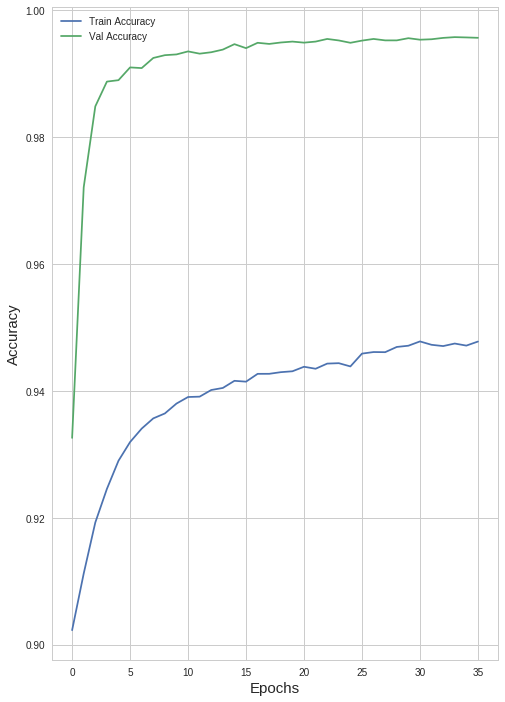

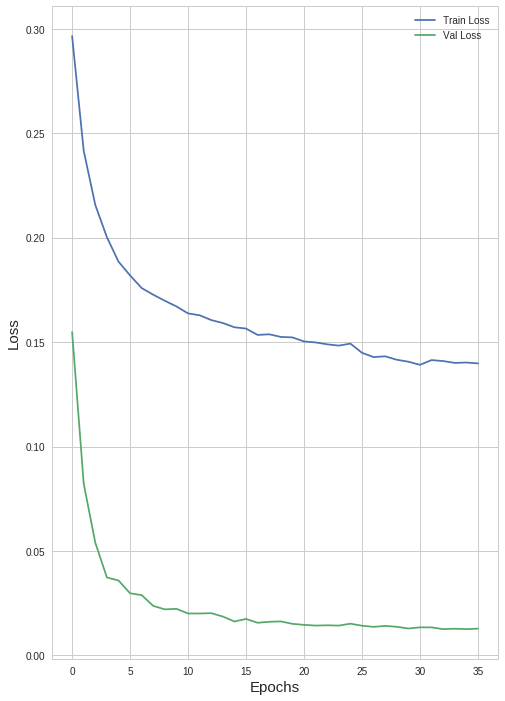

In [0]:
plot_history(history)

In [0]:
test.shape

(28000, 784)

In [0]:
X_test = test.reshape(-1,28,28,1)

In [0]:
predictions = model.predict(X_test)

In [0]:
final_predictions = [np.argmax(i) for i in predictions]

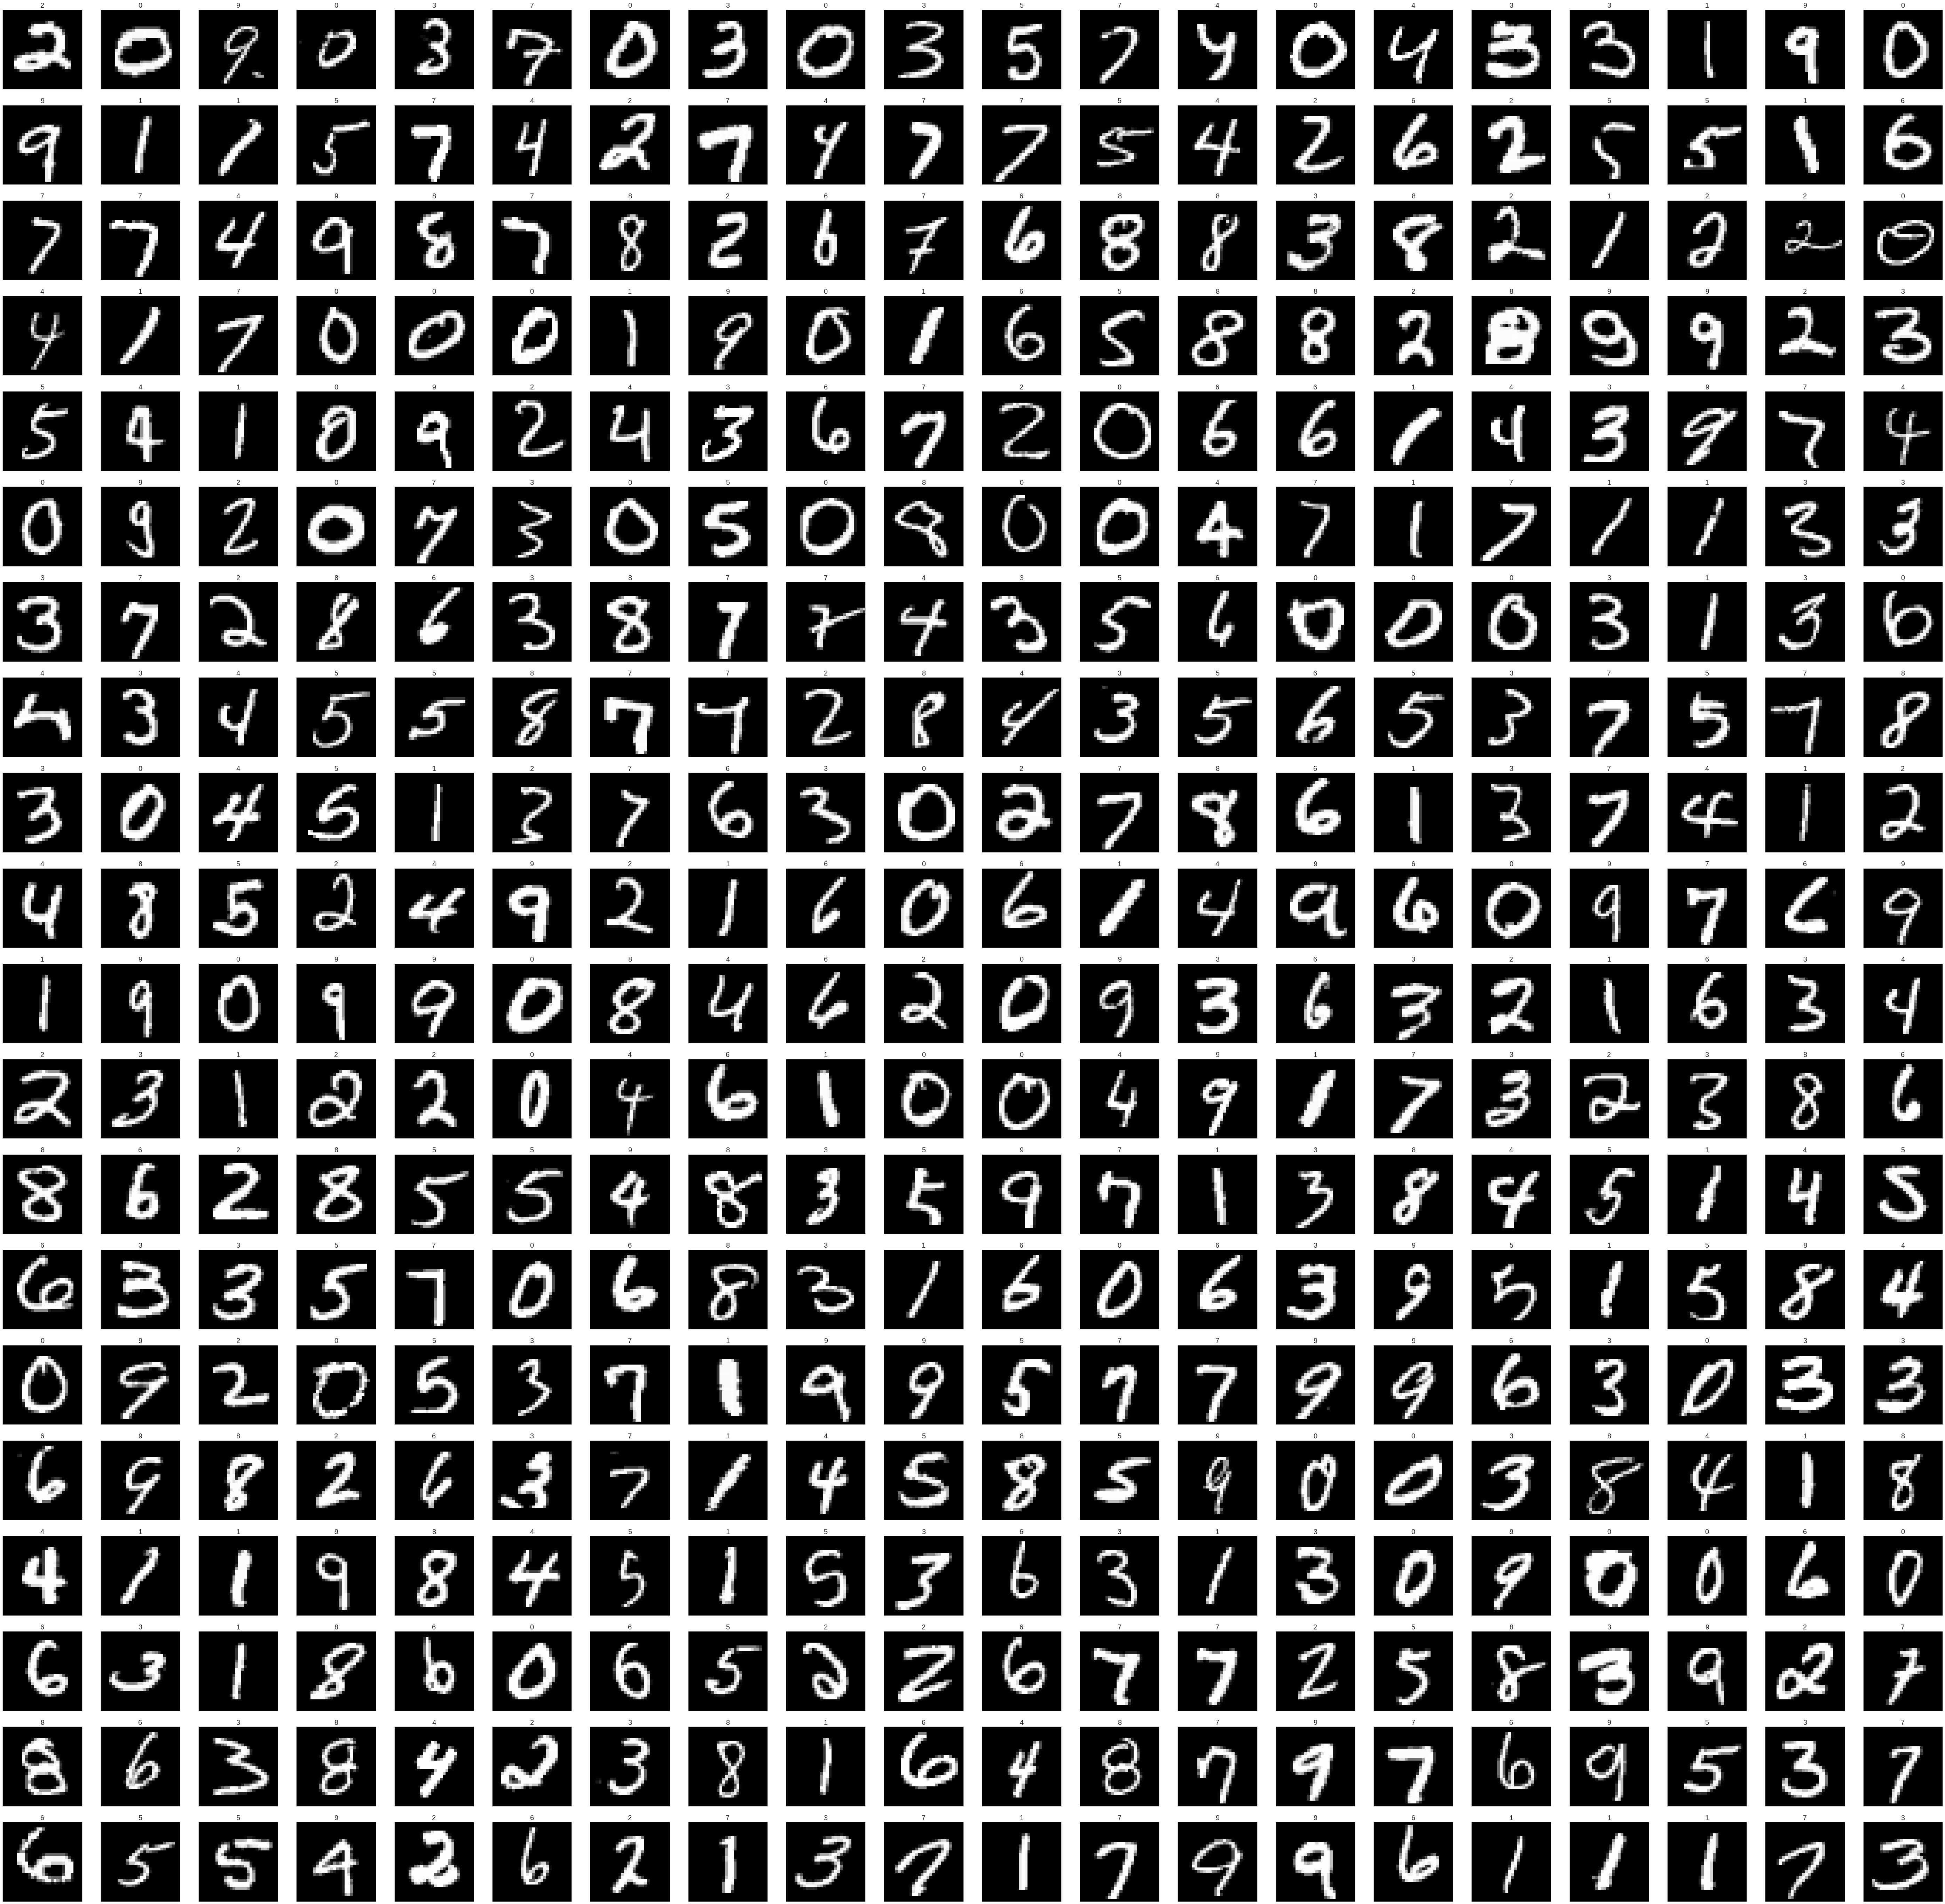

In [0]:
plt.figure(figsize=(100,100))
sns.set_style('whitegrid')
for i in range(400):
  plt.subplot(20,20,i+1)
  plt.imshow(X_test[i].squeeze(),interpolation='nearest',cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(final_predictions[i],fontsize=20)
plt.show()

In [0]:
from google.colab import files
files.upload()

Saving mnist.npz to mnist.npz


In [0]:
!ls

kaggle.json  mnist.npz	sample_data  sample_submission.csv  test.csv  train.csv


# Perfect 100% MNIST

In [0]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

In [0]:
MNIST_image = np.vstack((x_train,x_test))

In [0]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
MNIST_label = np.vstack((y_train,y_test))

In [0]:
MNIST_image = MNIST_image.reshape(-1,784)

In [0]:
Kaggle_test_image = pd.read_csv("test.csv")
Kaggle_test_image = Kaggle_test_image.values.astype("uint8")
Kaggle_test_label = np.empty( (28000,1), dtype="uint8" )

In [0]:
c1=0; c2=0;
print("Classifying Kaggle's 'test.csv' using kNN k=1 and MNIST 70k images")
for i in range(0,28000): # loop over Kaggle test
    for j in range(0,70000): # loop over MNIST images
        if np.absolute(Kaggle_test_image[i,] - MNIST_image[j,]).sum()==0:
            Kaggle_test_label[i] = MNIST_label[j]
            if i%1000==0:
                print("  %d images classified perfectly" % (i))
            if j<60000:
                c1 += 1
            else:
                c2 += 1
            break
if c1+c2==28000:
    print("  28000 images classified perfectly")
    print("Kaggle's 28000 test images are fully contained within MNIST's 70000 dataset")
    print("%d images are in MNIST-train's 60k and %d are in MNIST-test's 10k" % (c1,c2))

  1000 images classified perfectly
  2000 images classified perfectly
  3000 images classified perfectly
  4000 images classified perfectly
  5000 images classified perfectly
  6000 images classified perfectly
  7000 images classified perfectly
  8000 images classified perfectly
